In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
%matplotlib inline

In [2]:
# generating simulated data
alpha = 2
beta = 0.5
sigma = 10 # noise term variance
N = 5000

K = 1000 # number of repetitions
alpha_samples = np.zeros( (2,0))

for k in range(K):

    # simulate data
    x = np.array( [ gauss(0,1) for i in range(N)])
    noise = np.array( [ gauss(0,sigma) for i in range(N)])
    y = np.multiply( alpha, x) + beta + noise
    
    # fit the linear regression model
    z = np.append( x[:, None], np.ones( (N,1)), axis = 1)
    A = np.dot( z.transpose(), z) / N
    b = np.dot( y, z) / N
    alpha_hat = np.dot( np.linalg.pinv(A), b)
    
    alpha_samples = np.append( alpha_samples, alpha_hat[:, None], axis = 1)

In [3]:
alpha_hat

array([2.01455852, 0.62768936])

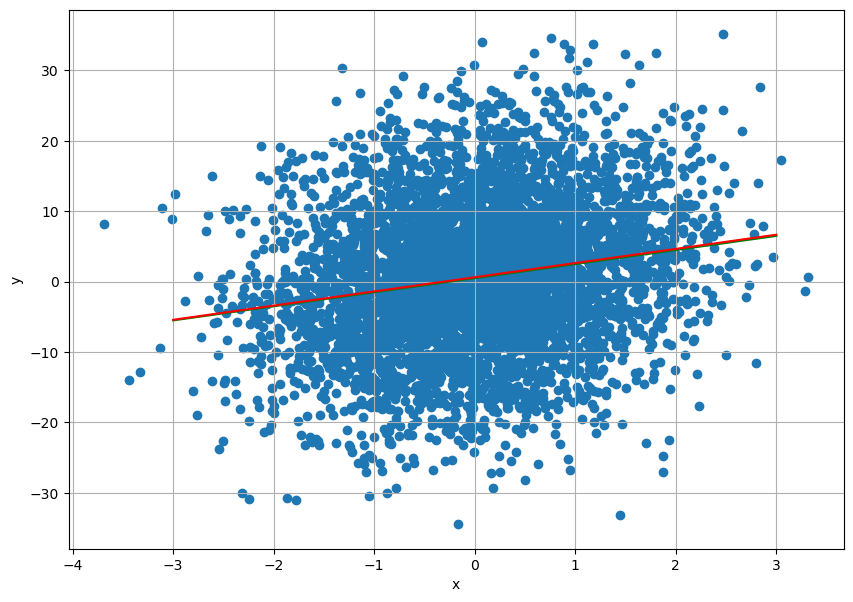

In [4]:
# plot results
plt.figure( figsize = (10,7))
plt.scatter( x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
x_plot = np.linspace( -3, 3, 100)
y_true = np.multiply( alpha, x_plot) + beta
plt.plot( x_plot, y_true, 'g')
y_fitted = np.multiply( alpha_hat[0], x_plot) + alpha_hat[1]
plt.plot( x_plot, y_fitted, 'r')

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,   6.,
          16.,  37.,  49., 101., 126., 149., 130., 124.,  92.,  76.,  45.,
          23.,  10.,   7.,   2.,   1.,   1.],
        [  1.,   2.,   2.,  14.,  37.,  51.,  81.,  97., 133., 168., 125.,
         101.,  81.,  54.,  39.,   8.,   3.,   0.,   2.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.01501028, 0.06568967, 0.11636906, 0.16704845, 0.21772784,
        0.26840723, 0.31908662, 0.36976601, 0.4204454 , 0.4711248 ,
        0.52180419, 0.57248358, 0.62316297, 0.67384236, 0.72452175,
        0.77520114, 0.82588053, 0.87655992, 0.92723931, 0.9779187 ,
        1.02859809, 1.07927749, 1.

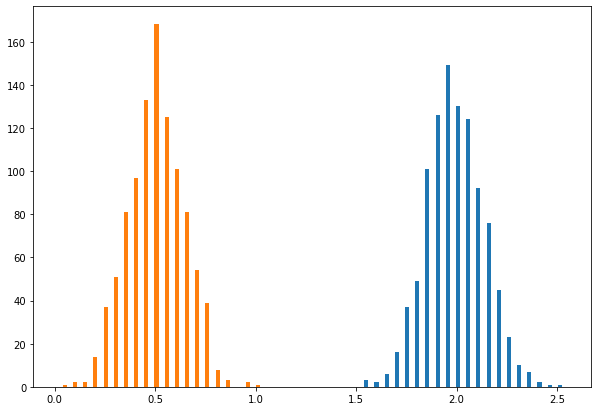

In [9]:
plt.figure( figsize = (10,7))
plt.hist( alpha_samples.transpose(), 50)